In [81]:
import obspy as obs
import glob
import pygmt
import numpy as np
import os
import utm
import geopandas as gpd
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
client = Client("IRIS")
from obspy import UTCDateTime

In [82]:
#client = Client("hugosan89", "Sancho8315")

lat = 37.2251
lon = 37.0209
minr = 0.
maxr = 5.
mind = 0.
maxd = 50.
minmag = 0.
maxmag = 8.
ini = "202212010000"
end = "202302281200"
t = UTCDateTime("2023-02-06T00:00:00.000")

#st = client.get_waveforms("IU", "ANTO", "00", "LHZ", t, t + 24 * 4 * 60 * 60)
#st.plot()
events = client.get_events(starttime=ini,
                   endtime=end,
                   minmagnitude=minmag,
                   maxmagnitude=maxmag,
                   #include_unknown_mag=True, 
                   mindepth=mind, 
                   maxdepth=maxd,
                   latitude=lat, 
                   longitude=lon, 
                   minradius=minr, 
                   maxradius=maxr)  

ev_lat, ev_lon, ev_mag = [], [], []
for ev in events.events:
    ev_lat.append(ev.preferred_origin().latitude)
    ev_lon.append(ev.preferred_origin().longitude)
    ev_mag.append(ev.preferred_magnitude().mag)
    


In [83]:
id_main = np.where(np.asarray(ev_mag) == 7.8)[0][0]
print(id_main)

348


In [84]:
list_files = glob.glob('v2/*H*Z*')
list_files.sort()

In [85]:
s = obs.Stream()
for i in range(len(list_files)):
    file_name = list_files[i]
    t = obs.read(file_name)
    s = s+t

In [86]:
list_axitra = glob.glob('SEISMO_TURKEY/*vert.mod')

In [87]:
T = 300
ntaxi = 1024

fontz = 8 #labels
fontz2 = 5 #ticks

#fig1, axs1 = plt.subplots(41, 3, dpi=500, figsize=(4, 6), facecolor='white')
#fig1.suptitle(time_stamp_title, x=0.9, y=0.99, fontweight='bold')
print(len(list_files))
k = 0
nm = []
sta_lon = []
sta_lat = []
for i in range(41):
    for j in range(1):
        # load axitra data
        t = np.linspace(0, T, ntaxi)
        sta = s[k].stats.station
        sta_lon.append(s[k].stats.sac.stlo)
        sta_lat.append(s[k].stats.sac.stla)
        nm.append(s[k].stats.sac.kstnm)
    k += 1
print(nm)

41
['MVOU', 'PARA', 'ARPRA', 'BNN', 'BOZY', 'CEYT', 'CHBY', 'CMRD', 'CORM', 'DARE', 'DYBB', 'ERBG', 'ERZN', 'GULA', 'IKL', 'KAMT', 'KHMN', 'KMRS', 'KOZK', 'KRMN', 'KRTS', 'KYHL', 'LFK', 'LMOS', 'MAZI', 'MERS', 'RFHY', 'RSDY', 'SARI', 'SLFK', 'SULT', 'SVAN', 'SVSK', 'TAHT', 'TOKT', 'TUNC', 'URFA', 'YAYX', 'YESY', 'YOZ', 'ANDN']


coast [WARNING]: 0.25/5.25 not a valid number and may not be decoded properly.
/home/sanchezh/anaconda3/envs/insta/lib/python3.8/site-packages/geopandas/io/file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


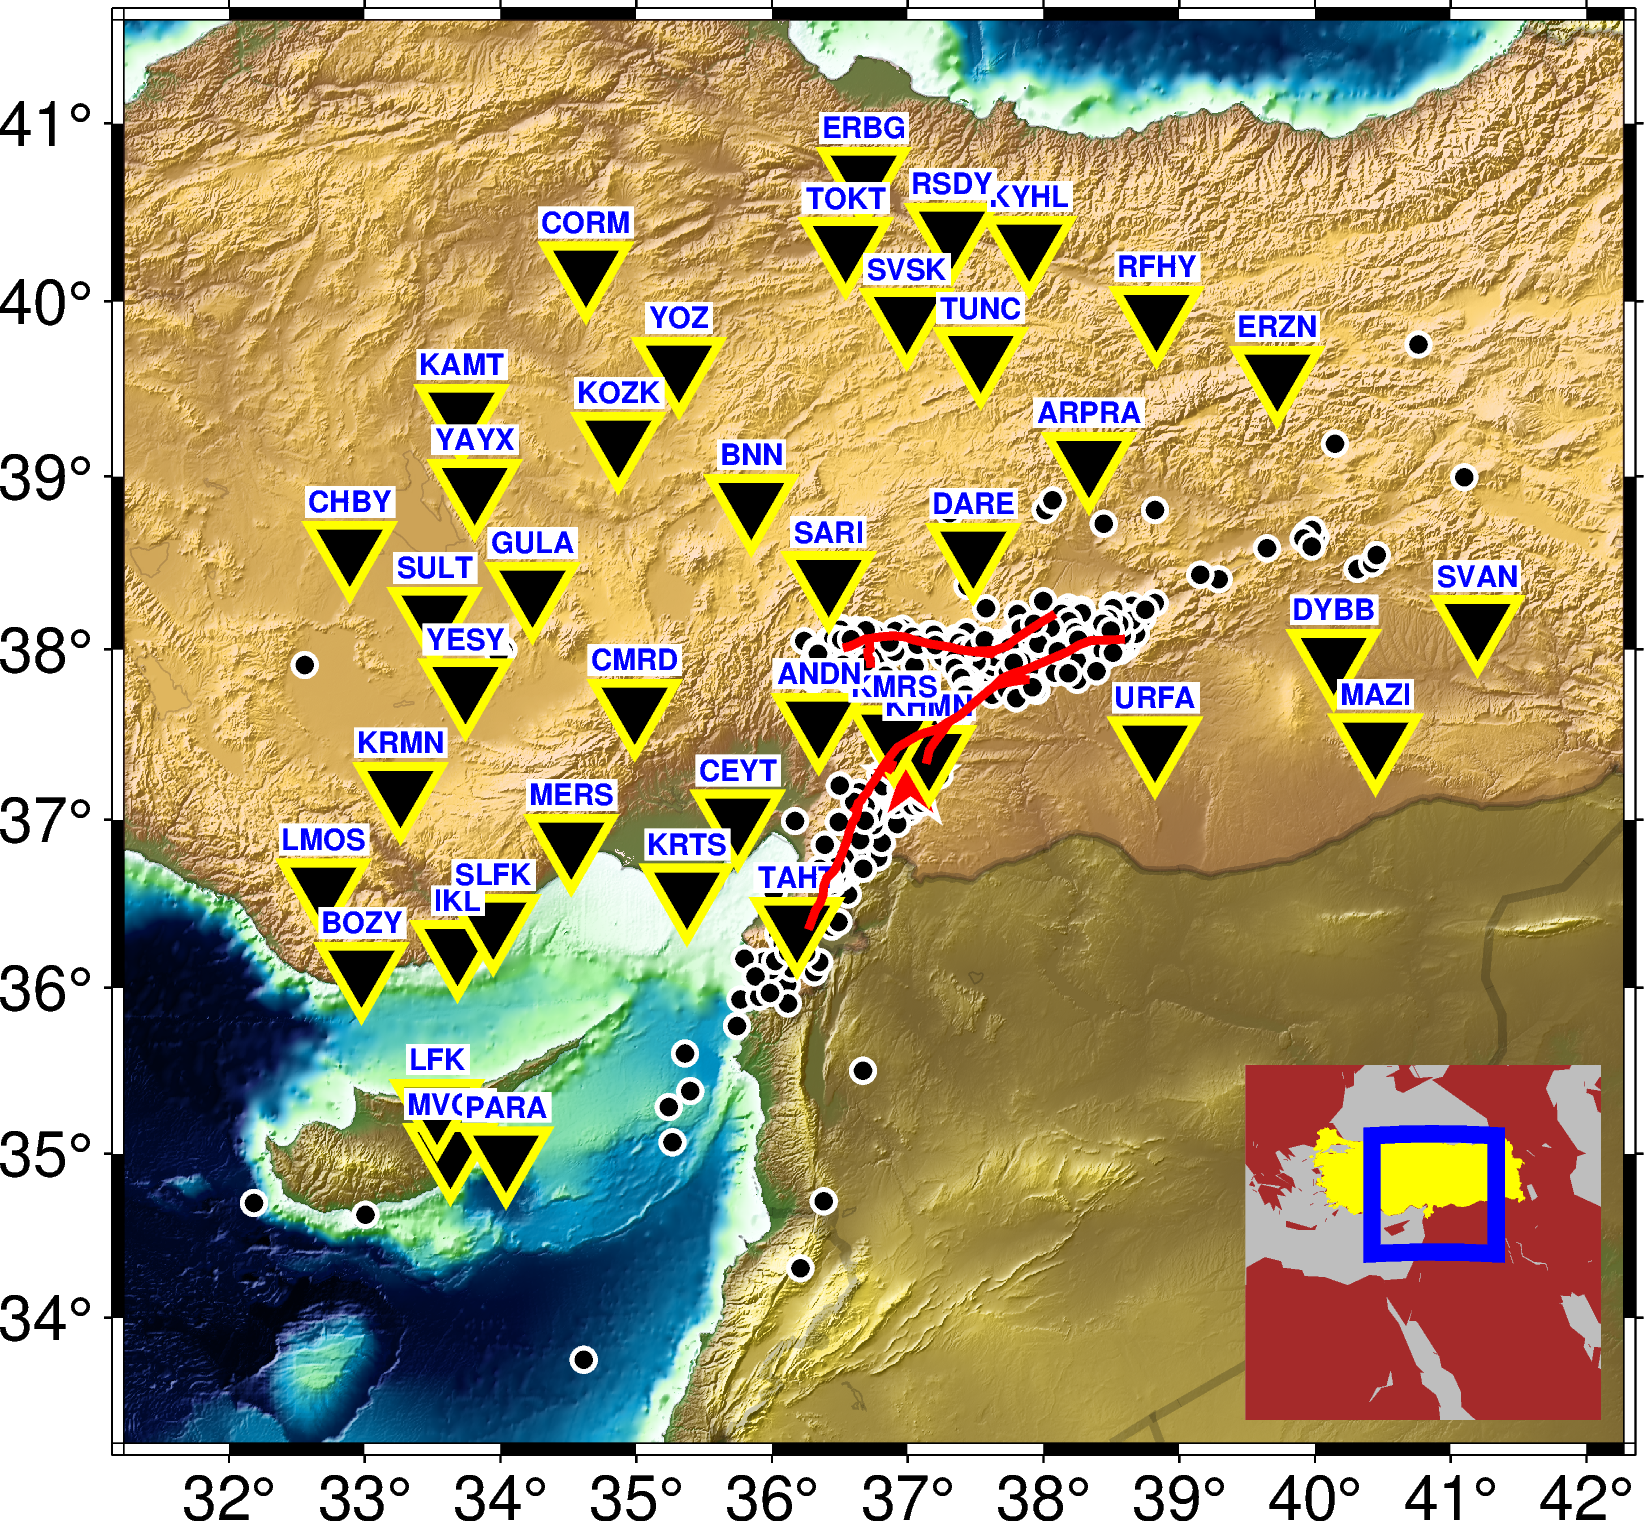

In [88]:
# Plot a map with all the info
# Initialize figure for map
fig1= pygmt.Figure()

# FORMATEA TAMANO DE LETRA
pygmt.config(FORMAT_GEO_MAP='D')  # Use decimal degrees
pygmt.config(FONT='15p')
# Minimum and Maximum coordinates
min_lat = 34.5#np.min(stations_lat)
max_lat = 40.3#np.max(stations_lat)
min_lon = 32.5 #np.min(stations_lon)
max_lon = 41 #np.max(stations_lon)
canvas = (max_lon - min_lon)*0.15

# Plot elevation from grid
fig1.grdimage(
    '@earth_relief_15s',  #DATABASE FORM INTERNET
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    cmap='relief',
    #frame=['WSne','a0.2f0.2']
    shading=True,
    #transparency=70
    frame=['WSne','ag','1p']
)
# Plot coast lines for the whole world
fig1.coast(
    region=[min_lon-canvas, max_lon+canvas, min_lat-canvas, max_lat+canvas],
    projection='M5i',
    shorelines='0.25/5.25p,black', 
    # Nivel de Linea1-4 / Ancho de lapiz , color
    water=None,
    borders="1/2p,black",
    land=None,
    resolution="f",
    dcw="TR+glightred+p0.5p",
    transparency=80,
)

# Plot events
fig1.plot(
    x=ev_lon,
    y=ev_lat,
    style='c0.2',
    projection='M5i',
    color='black',
    pen='1.0p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='01/12/22-01/03/23'
)

# Plot main event
fig1.plot(
    x=ev_lon[id_main],
    y=ev_lat[id_main],
    style='a0.8',
    projection='M5i',
    color='red',
    pen='1.0p,white',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='Mw 7.8'
)


# Plot events
fig1.plot(
    x=sta_lon,
    y=sta_lat,
    style='i0.8',
    projection='M5i',
    color='black',
    pen='2.0p,yellow',
    #style='c0.005',
    #color='violet',
    #pen='0.001,black',
    label='Stations'
)
station_names = []
for c in range(len(nm)):
    station_names.append(nm[c])
# Number of stations
n_stations = len(station_names)
for i in range(len(sta_lat)):
    fig1.text(
        x=sta_lon[i],
        y=sta_lat[i],
        text=station_names[i],
        offset="0/0.4",
        font="7p,Helvetica-Bold,blue", 
        fill="white"        
    )
    
rectangle_x = [min_lon-canvas, min_lon-canvas, max_lon+canvas, max_lon+canvas, min_lon-canvas]
rectangle_y = [min_lat-canvas, max_lat+canvas, max_lat+canvas, min_lat-canvas, min_lat-canvas]

with fig1.inset(position="jBR+w3c+o0.2c", margin=0, box="none"):
    # Create a figure in the inset using coast. This example uses the azimuthal
    # orthogonal projection centered at 47E, 20S. The land color is set to
    # "gray" and Madagascar is highlighted in "red3".
    fig1.coast(
        region=[20,60,20,60],
        projection="M1.5i",
        land="brown",
        water="gray",
        dcw="TR+gyellow",
    )
    fig1.plot(x=rectangle_x, y=rectangle_y, projection="M1.5i", pen="4p,blue")

fault_shp = os.path.join("fault_data","rupture_james_shapefile.shp")

gdf = gpd.read_file(fault_shp)

all_data = []
all_data.append(gdf[gdf["geometry"] == "LINESTRING"])

#all_data.append(gdf[gdf["COUNTYENG"]=="Taipei City"])
#all_data.append(gdf[gdf["COUNTYENG"]=="Tainan City"])

for data_shp in all_data:
    fig1.plot(data=data_shp,color="red")
fig1.plot(data=fault_shp, pen="2p,red", label='Traces')

fig1.show()

In [89]:
print(np.max(sta_lon),np.min(sta_lon))
print(np.max(sta_lat),np.min(sta_lat))


41.1984 32.6962
40.712 34.994


In [90]:
for i in range(41):
    print(station_names[i], sta_lon[i], sta_lat[i])

MVOU 33.632 35.016
PARA 34.04 34.994
ARPRA 38.3356 39.0929
BNN 35.8472 38.8521
BOZY 32.9763 36.1069
CEYT 35.7478 37.0105
CHBY 32.8902 38.5823
CMRD 34.9902 37.6623
CORM 34.6302 40.1785
DARE 37.4832 38.5712
DYBB 40.1393 37.9532
ERBG 36.6768 40.712
ERZN 39.722 39.5867
GULA 34.236 38.3444
IKL 33.6845 36.2366
KAMT 33.7124 39.3692
KHMN 37.1574 37.3916
KMRS 36.9 37.5053
KOZK 34.868 39.2101
KRMN 33.2636 37.174
KRTS 35.375 36.573
KYHL 37.8955 40.3244
LFK 33.5335 35.2832
LMOS 32.6962 36.6021
MAZI 40.4465 37.4593
MERS 34.522 36.8678
RFHY 38.833 39.927
RSDY 37.3273 40.3971
SARI 36.4181 38.4072
SLFK 33.9464 36.3925
SULT 33.5157 38.1988
SVAN 41.1984 38.1511
SVSK 36.9925 39.9157
TAHT 36.1855 36.3755
TOKT 36.5443 40.3173
TUNC 37.5388 39.6942
URFA 38.8213 37.4409
YAYX 33.8115 38.9387
YESY 33.7431 37.7825
YOZ 35.3152 39.6376
ANDN 36.3452 37.58


In [16]:
print(ev_lat[345])
print(ev_lon[345])

37.2251
37.0209


In [10]:
s[k].stats.sac

AttribDict({'delta': 1.0, 'depmin': -0.0064952057, 'depmax': 0.0060503781, 'scale': 1.0, 'b': 0.0049999999, 'e': 324.005, 'o': 26.0, 't0': 79.464813, 't1': 121.22075, 'stla': 35.015999, 'stlo': 33.632, 'evla': 37.166, 'evlo': 37.042, 'evdp': 17.9, 'user0': 787.75397, 'user1': 1416.4583, 'dist': 388.83093, 'az': 233.16937, 'baz': 51.168716, 'gcarc': 3.4969568, 'depmen': -5.688446e-07, 'cmpaz': 90.0, 'nzyear': 2023, 'nzjday': 37, 'nzhour': 1, 'nzmin': 17, 'nzsec': 9, 'nzmsec': 650, 'nvhdr': 6, 'npts': 325, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 1, 'kstnm': 'MVOU', 'khole': '--', 'kt0': 'P', 'kt1': 'S', 'kcmpnm': 'HHZ', 'knetwk': 'CQ'})

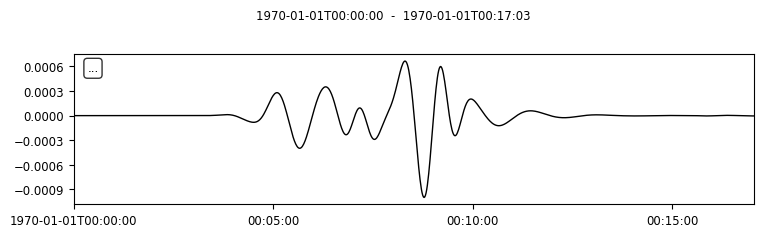

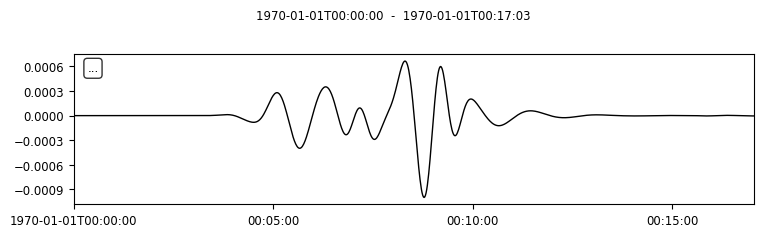

In [11]:
adata.plot()


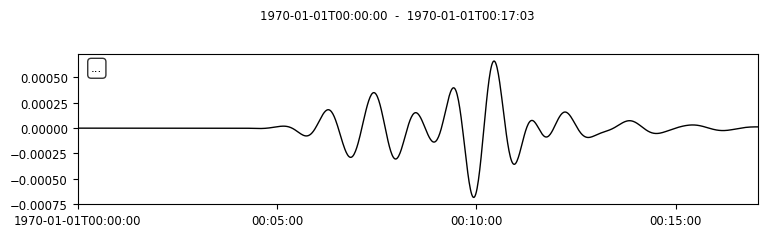

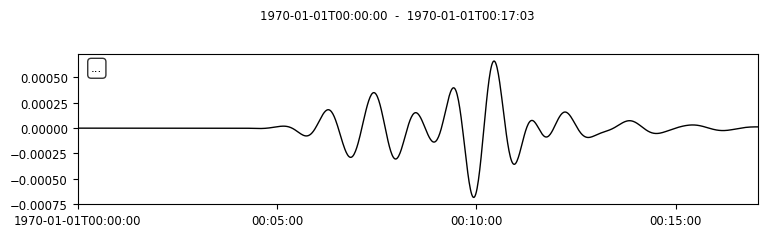

In [12]:
adata.filter("bandpass", freqmin=0.01, freqmax=0.02)
adata.plot()

In [14]:
len(lon)

17

In [ ]:
        if len(sta) == 3:
            sta = sta + '0'
        file_name = 'SEISMO_TURKEY/' + sta + 'vert.mod'
        #print(data)
        data = np.loadtxt(file_name, dtype=float, delimiter=" ", usecols=(0), unpack=True)
        adata = obs.Trace(data)
        adata.filter("bandpass", freqmin=0.01, freqmax=0.06)
        data = adata.data
        #print(data)
        # time axis sac data
        tsac = np.linspace(0, s[k].stats.npts-1, s[k].stats.npts)
        torig = tsac[int(s[k].stats.sac.o)]
        t0 = tsac[int(s[k].stats.sac.t0)]
        t1 = tsac[int(s[k].stats.sac.t1)]
        # time shift of axitra
        t = t + torig + 14.0
        # plot data comparison
        ax1 = axs1[i, j]
        if i == 0 and j == 2:
            ax1.plot(t, data / np.max(np.abs(data)), lw=0.3, color='red', label='axitra')
            ax1.plot(tsac, s[k].data / np.max(np.abs(s[k].data)), lw=0.4, color='blue', label='data')
            ax1.vlines(torig, -1, 1, lw=0.3, colors='k', linestyles='solid', label='t0') 
            ax1.vlines(t0, -1, 1, lw=0.3, colors='k', linestyles='solid', label='P') 
            ax1.vlines(t1, -1, 1, lw=0.3, colors='k', linestyles='solid', label='S') 
        else:
            ax1.plot(t, data / np.max(np.abs(data)), lw=0.3, color='red')
            ax1.plot(tsac, s[k].data / np.max(np.abs(s[k].data)), lw=0.4, color='blue')
            ax1.vlines(torig, -1, 1, lw=0.3, colors='k', linestyles='solid') 
            ax1.vlines(t0, -1, 1, lw=0.3, colors='k', linestyles='solid') 
            ax1.vlines(t1, -1, 1, lw=0.3, colors='k', linestyles='solid') 
        if j < 1:
            ax1.set_ylabel('m/s', fontsize=fontz)
        if i == 12:
            ax1.set_xlabel('Time', fontsize=fontz)
        ax1.tick_params(axis='both', which='major', labelsize=fontz2)
        ax1.text(10, -0.9, sta, horizontalalignment='left',
        verticalalignment='center', fontsize=5)
        k += 1
        leg = ax1.legend(ncol=2, loc=[0.12, 1.01], prop={'size': 5})

        ax1.set_xlim([0, 300])
#ax.set_ylim([-0.002, 0.002])
#ax.scatter(xy[0], xx[0], s=100, marker='.', lw=5, facecolor='white', edgecolor='black')
fig1.show()
fig1.savefig('Plot_comparison.pdf')